In [322]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [346]:
scale = 1.5
plt.rc('font', family='serif', serif='Times')
plt.rc('text', usetex=True)
plt.rc('axes', titlesize=12*scale)
plt.rc('xtick', labelsize=8*scale)
plt.rc('ytick', labelsize=8*scale)
plt.rc('axes', labelsize=10*scale)
plot_width = 3.487 * scale
plot_height = plot_width / 1.618

In [404]:
clean = np.array([np.sin(x) for x in np.arange(0,15,0.2)])
dirty = np.random.normal(0, 0.3, size=len(clean)) + clean
print(len(clean))

75


In [405]:
from statsmodels.tsa.ar_model import AR
t_size = 30
model = AR(clean[:-t_size])
model_fitted = model.fit()
clean_predictions = model_fitted.predict(
    start=len(clean)-t_size, 
    end=len(clean)-1, 
    dynamic=False)
model = AR(dirty[:-t_size])
model_fitted = model.fit()
dirty_predictions = model_fitted.predict(
    start=len(dirty)-t_size, 
    end=len(dirty)-1, 
    dynamic=False)

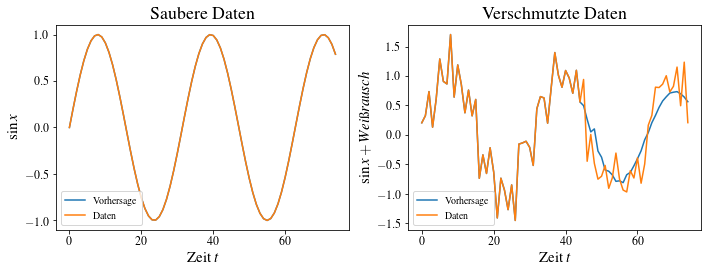

In [406]:
fig, ax = plt.subplots(1,2,figsize=(1.9*plot_width,1.2*plot_height))
ax[0].plot(np.concatenate([clean[:-t_size],clean_predictions]),label="Vorhersage")
ax[0].plot(clean,label="Daten")
ax[0].set_title('Saubere Daten')
ax[0].set_xlabel('Zeit $t$')
ax[0].set_ylabel('$\sin{x}$')
ax[1].plot(np.concatenate([dirty[:-t_size],dirty_predictions]),label="Vorhersage")
ax[1].plot(dirty,label="Daten")
ax[1].set_title('Verschmutzte Daten')
ax[1].set_xlabel('Zeit $t$')
ax[1].set_ylabel('$\sin{x} + Weißrausch$')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig("ar_sauber_verschmutze_daten.pdf")

In [407]:
dif = clean-dirty
model = AR(dif[:-t_size])
model_fitted = model.fit()
dif_predictions = model_fitted.predict(
    start=len(dif)-t_size, 
    end=len(dif)-1, 
    dynamic=False)

In [408]:
dirty_predictions[-t_size:] = dirty[-t_size:] + dif_predictions

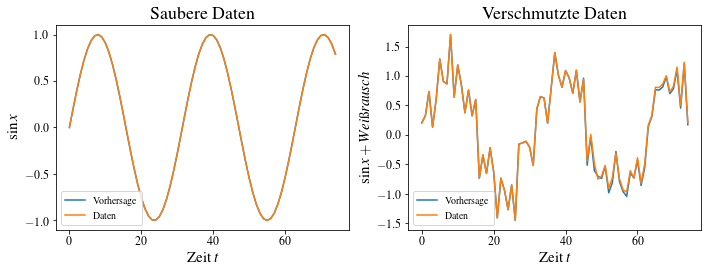

In [409]:
fig, ax = plt.subplots(1,2,figsize=(1.9*plot_width,1.2*plot_height))
ax[0].plot(np.concatenate([clean[:-t_size],clean_predictions]),label="Vorhersage")
ax[0].plot(clean,label="Daten")
ax[0].set_title('Saubere Daten')
ax[0].set_xlabel('Zeit $t$')
ax[0].set_ylabel('$\sin{x}$')
ax[1].plot(np.concatenate([dirty[:-t_size],dirty_predictions]),label="Vorhersage")
ax[1].plot(dirty,label="Daten")
ax[1].set_title('Verschmutzte Daten')
ax[1].set_xlabel('Zeit $t$')
ax[1].set_ylabel('$\sin{x} + Weißrausch$')
ax[0].legend()
ax[1].legend()
plt.tight_layout()
plt.savefig("arx_sauber_verschmutze_daten.pdf")

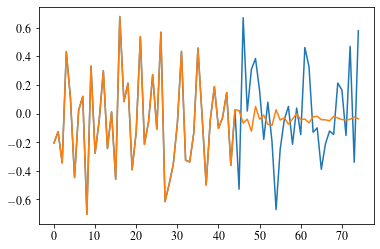

In [416]:
plt.plot(dif)
plt.plot(np.concatenate([dif[:-t_size],dif_predictions]))

In [414]:
dif_predictions

array([ 0.02192241, -0.06672577, -0.03874874, -0.12296515,  0.05006882,
       -0.03891135, -0.0105601 , -0.07565436, -0.08336371,  0.02724002,
       -0.04513805, -0.0294402 , -0.0742234 , -0.03676419, -0.00035513,
       -0.04310385, -0.03784152, -0.06482534, -0.02207016, -0.01914821,
       -0.04266567, -0.04363167, -0.05037886, -0.01979261, -0.0303787 ,
       -0.04179293, -0.04453534, -0.04023256, -0.02355175, -0.03624901])

In [415]:
dif[:-t_size]

array([-0.20525492, -0.12727889, -0.34545776,  0.43410582,  0.11018404,
       -0.44748498,  0.02313115,  0.12064526, -0.70435583,  0.33229086,
       -0.27840048, -0.04529579,  0.30064881, -0.24464019,  0.01181232,
       -0.46045623,  0.67940519,  0.08415408,  0.21272209, -0.39265445,
       -0.12505133,  0.53882134, -0.21559545, -0.05491868,  0.27365451,
       -0.10879512,  0.56982123, -0.61604535, -0.49454142, -0.35619492,
       -0.06845121,  0.43566806, -0.32609245, -0.33845581, -0.13325552,
        0.45871222, -0.01031336, -0.49921636, -0.04550519,  0.18929785,
       -0.1037322 , -0.02631794,  0.14761047, -0.3621569 ,  0.02643594])

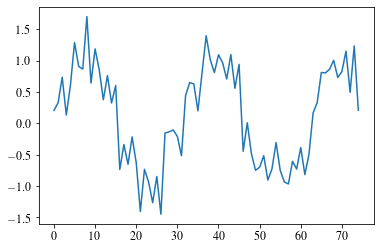

In [419]:
plt.plot(dirty.rolli)

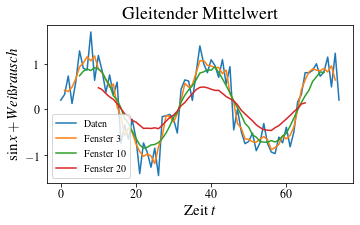

In [445]:
fig, ax = plt.subplots(1,1,figsize=(plot_width,plot_height))
rolling3 = pd.DataFrame(dirty).rolling(window=3,center=True).mean()
rolling10 = pd.DataFrame(dirty).rolling(window=10,center=True).mean()
rolling20 = pd.DataFrame(dirty).rolling(window=20,center=True).mean()
ax.plot(dirty,label="Daten")
ax.plot(rolling3,label="Fenster 3")
ax.plot(rolling10,label="Fenster 10")
ax.plot(rolling20,label="Fenster 20")
ax.set_title('Gleitender Mittelwert')
ax.set_xlabel('Zeit $t$')
ax.set_ylabel('$\sin{x} + Weißrausch$')
plt.legend()
plt.tight_layout()
plt.savefig("Gleitender_Mittelwert.pdf")